# Выполнил: Дружинин Алексей. Группа: 381603-3. Вариант: №1

In [141]:
import numpy as np
from matplotlib import pyplot as plt
import random
import matplotlib.patches as pth
from matplotlib.patches import Rectangle as Rec

## 1. Метод золотого сечения

In [142]:
def golden_section(function, a, b, accuracy):
    golden_ratio = (-1 + np.sqrt(5)) / 2
    x = b - (b - a) * golden_ratio
    y = a + (b - a) * golden_ratio
    f_x = function(x)
    f_y = function(y)
    while (b - a > accuracy):
        if (f_x > f_y):
            a = x
            x = y
            f_x = f_y
            y = a + (b - a) * golden_ratio
            f_y = function(y)
        else:
            b = y
            y = x
            f_y = f_x
            x = b - (b - a) * golden_ratio
            f_x = function(x)
    return [a, b]

Интервальная оценка минимума = [0.9999784539326585, 1.000051800894984]


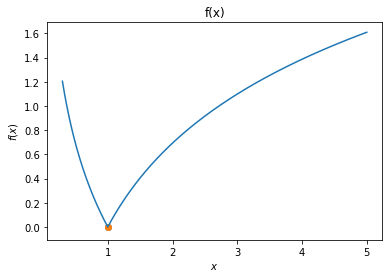

In [143]:
def test(x): # целевая функция
    return np.abs(np.log(x))

# параметры метода и области
a = 0.3
b = 5
accuracy = 0.0001

# применение метода и вывод результата
res = golden_section(test, a, b, accuracy)
print('Интервальная оценка минимума = ' + str(res))

# отрисовка графика
x = np.arange(a, b, 0.001)
y = [test(i) for i in x]
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.title('f(x)')
plt.plot(x, y)
plt.scatter(res[0], test(res[0]))
plt.scatter(res[1], test(res[1]))
plt.show()

## 2. Метод дихотомия-1

In [144]:
def dichotomy_one(function, a, b, accuracy, epsilon):
    while (b - a > accuracy):
        x = (b + a) / 2 - epsilon
        y = (b + a) / 2 + epsilon
        if (function(x) > function(y)):
            a = x
        else:
            b = y
    return [a, b]

Интервальная оценка минимума = [0.9999511420898438, 1.000023058395386]


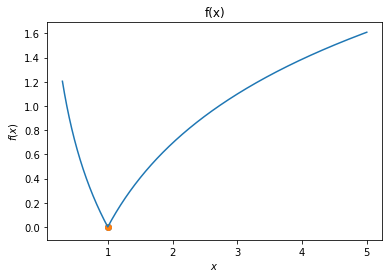

In [145]:
def test(x): # целевая функция
    return np.abs(np.log(x))

# параметры метода и области
a = 0.3
b = 5
accuracy = 0.0001
epsilon = 0.0000001

# применение метода и вывод результата
res = dichotomy_one(test, a, b, accuracy, epsilon)
print('Интервальная оценка минимума = ' + str(res))

# отрисовка графика
x = np.arange(a, b, 0.001)
y = [test(i) for i in x]
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.title('f(x)')
plt.plot(x, y)
plt.scatter(res[0], test(res[0]))
plt.scatter(res[1], test(res[1]))
plt.show()

## 3. Метод деления на три

In [146]:
class Rectangle:
    def __init__(self, x, y, w, h):
        self.x = x
        self.y = y
        self.w = w
        self.h = h
        
    def getCenter(self): # получение геометрического центра прямоугольника
        return [self.x + 0.5 * self.w, self.y + 0.5 * self.h]
    
    def getDiam(self): # получение диаметра прямоугольника(диагонали)
        return np.sqrt(self.w ** 2 + self.h ** 2)
    
    def division(self): # деление прямоугольника на три равных по большему ребру
        if self.w >= self.h:
            a = Rectangle(self.x, self.y, self.w / 3., self.h)
            b = Rectangle(self.x + self.w / 3., self.y, self.w / 3., self.h)
            c = Rectangle(self.x + 2 * self.w / 3., self.y, self.w / 3., self.h)
        else:
            a = Rectangle(self.x, self.y, self.w, self.h / 3.)
            b = Rectangle(self.x, self.y + self.h / 3., self.w, self.h / 3.)
            c = Rectangle(self.x, self.y + 2 * self.h / 3., self.w, self.h / 3.)
        return [a, b, c]
    
    def draw(self, ax): # отрисовка прямоугольника
        ax.add_patch(Rec((self.x,self.y), self.w, self.h, fill = False))
    
def evaluation(f, l, p): # вычисление нижней оценки 
    return f - l * p.getDiam() * 0.5

def division_into_three(function, x1, y1, w, h, l, epsilon):
    rectangles = [] # список прямоугольников
    Q = [] # список значений функции в центрах прямоугольников
    R = [] # список значений нижних оценок прямоугольников
    # разбиение первого прямоугольника на три и подсчет минимумов оценок и значений функции
    first = Rectangle(x1, y1, w, h)
    rectangles += first.division()
    for rect in rectangles:
        Q.append(function(*rect.getCenter()))
    Q_arg_min = Q.index(min(Q))
    for q, rect in zip(Q, rectangles):
        R.append(evaluation(q, l, rect))
    R_arg_min = R.index(min(R))
    while Q[Q_arg_min] - R[R_arg_min] > epsilon:
        # корректировка списков
        for rect in rectangles[R_arg_min].division():
            Q.append(function(*rect.getCenter()))
        for q, rect in zip(Q[-3:], rectangles[R_arg_min].division()):
            R.append(evaluation(q, l, rect))
        rectangles += rectangles[R_arg_min].division()
        rectangles.pop(R_arg_min)
        Q.pop(R_arg_min)
        R.pop(R_arg_min)
        # вычисление минимумов
        Q_arg_min = Q.index(min(Q))
        R_arg_min = R.index(min(R))
    return Q[Q_arg_min], rectangles[Q_arg_min], rectangles

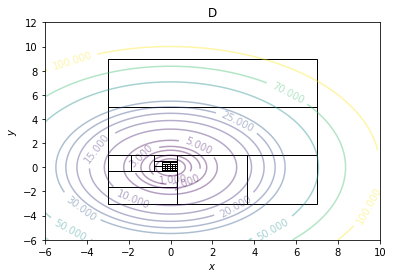

Qmin = 0.0019814052735863397, center of last rectangle = [0.02469135802469153, 0.03703703703703687]


In [147]:
def test_func(x, y): # целевая функция
    return x ** 2 + y ** 2

def MakeData(function, x1, y1, a, b): # создание массива данных для графика линий уровня
    x = np.arange(x1 - 3, x1 + a + 3, 0.1)
    y = np.arange(y1 - 3, y1 + b + 3, 0.1)
    xgrid, ygrid = np.meshgrid(x, y)
    zgrid = function(xgrid, ygrid)
    return xgrid, ygrid, zgrid

# параметры метода и области
x1 = -3
y1 = -3
a = 10
b = 12
l = 1
eps = 0.1

# создание графика
plt.figure()
ax = plt.gca()
plt.xlim(x1 - 3, x1 + a + 3)
plt.ylim(y1 - 3, y1 + b + 3)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('D')

# отрисовка линий уровня
x, y, z = MakeData(test_func, x1, y1, a, b)
level = [0.5, 1, 2, 3, 5, 10, 15, 20, 25, 30, 50, 70, 100]
levels = plt.contour(x, y, z, alpha = 0.4, levels = level)
plt.clabel(levels)

# применение метода и визуализация
resQ, resR, rects = division_into_three(test_func, x1, y1, a, b, l, eps)
for idx in rects:
        idx.draw(ax)
plt.show()

# вывод результата
print('Qmin = ' + str(resQ) + ', center of last rectangle = ' + str(resR.getCenter()))